Accuracy: 0.5


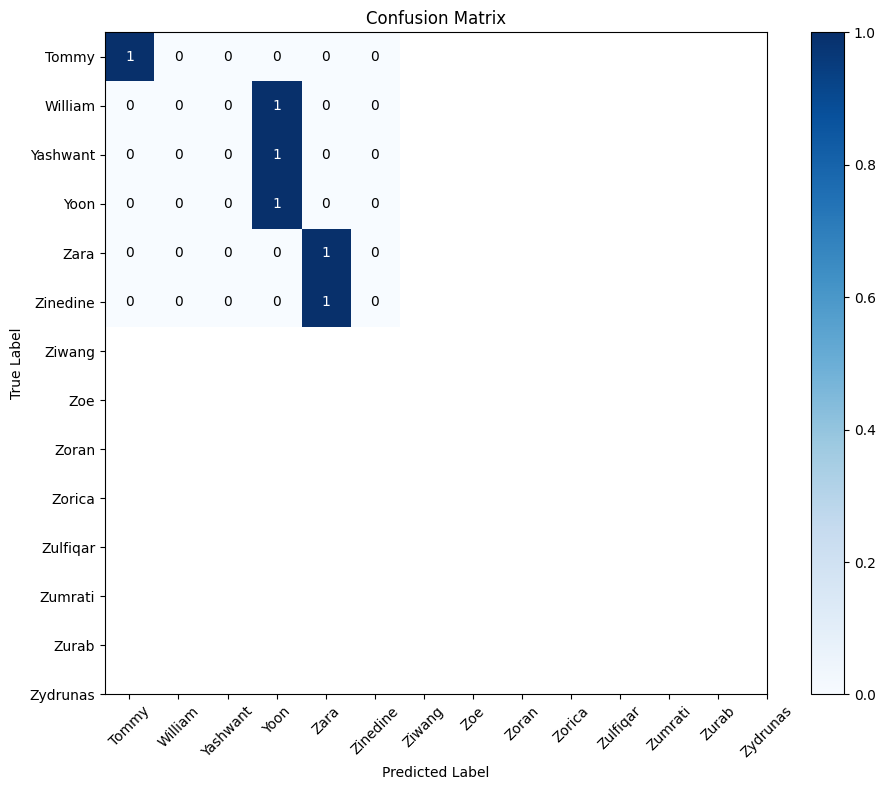

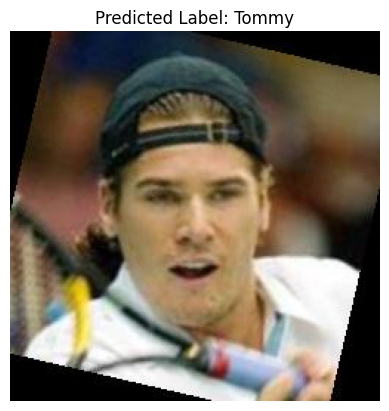

In [18]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.io import imread_collection
import os
import matplotlib.pyplot as plt
import random

# Path to the directory containing LFW dataset in the Colab environment
lfw_dir = "/content/sample_data/lfw"

# Load images
image_files = imread_collection(os.path.join(lfw_dir, "*.jpg"))

# Extract labels from image file names
labels = [os.path.basename(file).split('_')[0] for file in image_files.files]

# Encode labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(image_files, encoded_labels, test_size=0.2, random_state=42)

# Flatten images for SVM
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_test])

# Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train_flat, y_train)

# Predict on test set
predictions = svm.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = label_encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Display an example image with predicted label
index = random.randint(0, len(X_test) - 1)
example_image = X_test[index]
predicted_label = label_encoder.inverse_transform([predictions[index]])[0]

plt.figure()
plt.imshow(example_image)
plt.title('Predicted Label: ' + predicted_label)
plt.axis('off')
plt.show()
